TITLE
Amazon Fine Food Reviews – EDA, Visualization and Sentiment Analysis
🟦 INTRODUCTION

This notebook performs Exploratory Data Analysis (EDA), Data Visualization, and Sentiment Analysis on the Amazon Fine Food Reviews dataset. The dataset contains user-generated reviews for various food products sold on Amazon including ratings, text reviews, summary titles, user identifiers, time of review, and product identifiers.
The purpose of this analysis is to understand customer opinions, identify sentiment patterns, and visualize insights that could support product evaluation, marketing and business decision-making.

🟦 OBJECTIVES
The objectives of this notebook are:

To explore the dataset structure and identify key attributes.

To analyze rating distributions and review trends.

To detect patterns and relationships using visualizations.

To analyze customer sentiments using Natural Language Processing (NLP).

To interpret overall user opinions and insights.

In [1]:
import sys
print(sys.executable)


C:\Users\yashw\AppData\Local\Programs\Python\Python310\python.exe


In [2]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn textblob nltk


STEP 1 – Import Libraries & Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

import nltk
nltk.download('punkt')

%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv(r"C:\Users\yashw\OneDrive - Avinia\github Projects of Priyanka Burra\amazon_sentiment_project\data\Reviews.csv")


In [5]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape   # number of rows, columns


(568454, 10)

STEP 2 – Exploratory Data Analysis

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df = df[['ProductId', 'UserId', 'Score', 'Time', 'Summary', 'Text']]
df.head()


,ProductId,UserId,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df = df.drop_duplicates()
df.shape


(567623, 6)

In [12]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month


In [13]:
df['Score'].value_counts()


Score
5    362695
4     80598
1     51992
3     42577
2     29761
Name: count, dtype: int64

In [14]:
df['Score'].mean()


4.1843124750054175

In [15]:
df['Year'].value_counts().sort_index()


Year
1999         6
2000        32
2001        13
2002        73
2003       132
2004       561
2005      1334
2006      6648
2007     22261
2008     34119
2009     55236
2010     85535
2011    163107
2012    198566
Name: count, dtype: int64

STEP 3 – Data Visualization 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
sns.set(style="whitegrid")


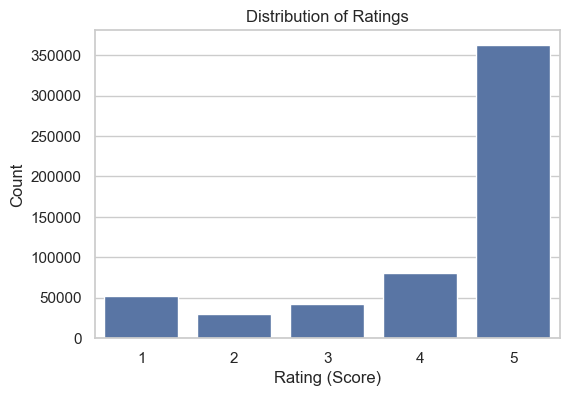

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating (Score)")
plt.ylabel("Count")
plt.show()


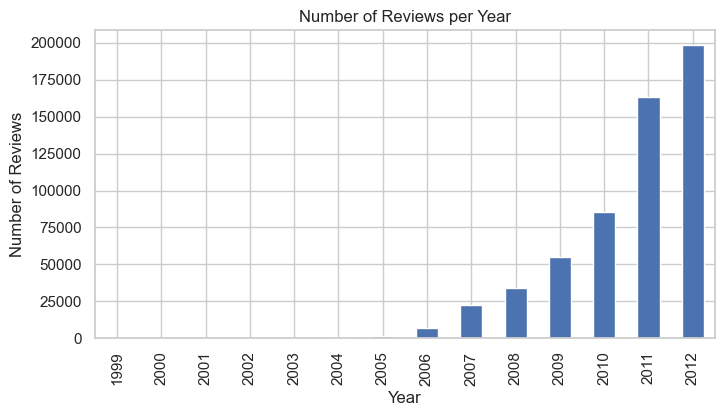

In [19]:
reviews_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
reviews_per_year.plot(kind='bar')
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


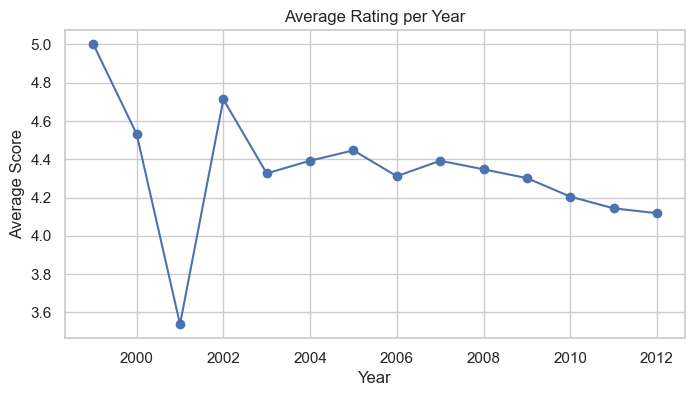

In [20]:
avg_score_year = df.groupby('Year')['Score'].mean()

plt.figure(figsize=(8,4))
avg_score_year.plot(kind='line', marker='o')
plt.title("Average Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()


In [21]:
top_products = df['ProductId'].value_counts().head(10)
top_products


ProductId
B007JFMH8M    913
B0026RQTGE    631
B002QWHJOU    631
B002QWP8H0    631
B002QWP89S    631
B003B3OOPA    623
B001EO5Q64    567
B0013NUGDE    564
B007M832YY    564
B0026KPDG8    564
Name: count, dtype: int64

STEP 4 – Sentiment Analysis 

In [22]:
df_small = df[['Score', 'Text']].dropna().sample(10000, random_state=42)
df_small.head()


,Score,Text
562605,5,I travel a lot and am always on the lookout fo...
232413,5,Check the picture I've submitted to see the ki...
530686,1,This tea was suggested by Dr. Oz on his show a...
265706,5,I have always loved this Nestle Cream ever sin...
153543,5,"I have two very finicky greyhounds, and they L..."


In [23]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_small['polarity'] = df_small['Text'].apply(get_polarity)
df_small[['Text', 'polarity']].head()


,Text,polarity
562605,I travel a lot and am always on the lookout fo...,0.516865
232413,Check the picture I've submitted to see the ki...,0.162765
530686,This tea was suggested by Dr. Oz on his show a...,0.292857
265706,I have always loved this Nestle Cream ever sin...,0.133333
153543,"I have two very finicky greyhounds, and they L...",0.121875


In [24]:
def polarity_to_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df_small['sentiment'] = df_small['polarity'].apply(polarity_to_label)
df_small[['Text', 'polarity', 'sentiment']].head()


,Text,polarity,sentiment
562605,I travel a lot and am always on the lookout fo...,0.516865,positive
232413,Check the picture I've submitted to see the ki...,0.162765,positive
530686,This tea was suggested by Dr. Oz on his show a...,0.292857,positive
265706,I have always loved this Nestle Cream ever sin...,0.133333,positive
153543,"I have two very finicky greyhounds, and they L...",0.121875,positive


In [25]:
df_small['sentiment'].value_counts()


sentiment
positive    7660
neutral     1907
negative     433
Name: count, dtype: int64

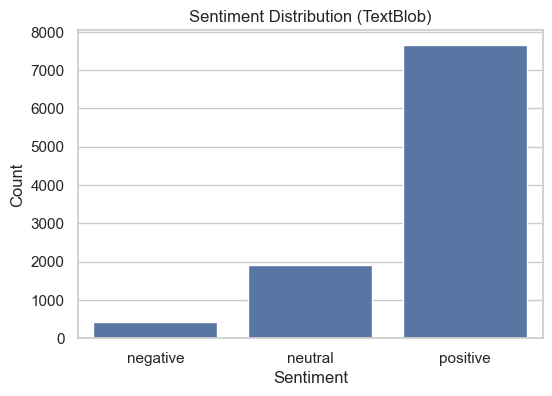

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df_small, order=['negative','neutral','positive'])
plt.title("Sentiment Distribution (TextBlob)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [27]:
def score_to_label(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df_small['rating_label'] = df_small['Score'].apply(score_to_label)


In [28]:
pd.crosstab(df_small['rating_label'], df_small['sentiment'])


sentiment,negative,neutral,positive
rating_label,,,
negative,275,590,523
neutral,40,232,460
positive,118,1085,6677


In [29]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)         # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)        # remove non-letters
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

df_small['clean_text'] = df_small['Text'].apply(clean_text)


In [30]:
df_small['polarity'] = df_small['clean_text'].apply(get_polarity)
df_small['sentiment'] = df_small['polarity'].apply(polarity_to_label)


Conclusion

The analysis of the Amazon Fine Food Reviews dataset demonstrates that the majority of customers provide ratings of four and five stars, indicating a generally positive level of satisfaction with the food products available on the platform. A noticeable increase in the number of reviews over successive years suggests a growing usage of the platform and a rising volume of customer engagement.

Furthermore, the sentiment analysis performed using TextBlob confirms that most review texts exhibit positive emotions, which is consistent with the observed rating distribution. The alignment between numerical ratings and textual sentiment strengthens the understanding of customer preferences and perceptions.

Overall, the combination of rating analysis, trend visualization, and sentiment evaluation provides valuable insights into customer opinion and can support informed decision-making related to product improvement, marketing strategies, and customer experience enhancement.

